<img src="https://github.com/LucaScaldaferri/Curso_Cientista_de_Dados/blob/main/logo_ebac.png?raw=true" alt="ebac-logo">


---

# **Profissão Cientista de Dados**
## **Módulo** 9 | TdD III - Agregações e operações em grupos | Exercício 1
Resolução Caderno de **Exercícios**<br> 
Aluno [Lucas Scaldaferri Magalhães Freitas](https://www.linkedin.com/in/0scaldaferri-lucas/) <br>

---

# Livro para consulta:
- https://jakevdp.github.io/PythonDataScienceHandbook/03.08-aggregation-and-grouping.html
- https://jakevdp.github.io/PythonDataScienceHandbook/03.09-pivot-tables.html
    

# 1. Importando bibliotecas <a name="import"></a>

<div style="text-align: right"
     
[Voltar ao índice](#Contents)

In [52]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

# 2. Carregando o dataframe SINASC <a name="read"></a>
<div style="text-align: right"
     
[Voltar ao índice](#Contents)

In [2]:
sinasc_raw = pd.read_csv('SINASC_RO_2019.csv')
sinasc_raw.head()

,ORIGEM,CODESTAB,CODMUNNASC,LOCNASC,IDADEMAE,ESTCIVMAE,ESCMAE,CODOCUPMAE,QTDFILVIVO,QTDFILMORT,...,KOTELCHUCK,CONTADOR,munResStatus,munResTipo,munResNome,munResUf,munResLat,munResLon,munResAlt,munResArea
0,1,2679477.0,110001,1,19,5.0,8 a 11 anos,NaN,0.0,0.0,...,5,1,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
1,1,2679477.0,110001,1,29,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,2,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
2,1,2679477.0,110001,1,37,9.0,8 a 11 anos,513205.0,2.0,0.0,...,5,3,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
3,1,2516500.0,110001,1,30,5.0,12 anos ou mais,231205.0,0.0,0.0,...,4,4,ATIVO,MUNIC,Alto Alegre dos Parecis,Rondônia,-12.13178,-61.85308,397.0,3958.273
4,1,2516500.0,110001,1,30,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,5,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025


# Tarefa 1

### 1. Idade media das mães e dos pais por município (coluna munResNome)


In [18]:
sinasc_1 = sinasc_raw[['IDADEMAE', 'IDADEPAI', 'munResNome']]
sinasc_1

,IDADEMAE,IDADEPAI,munResNome
0,19,26.0,Alta Floresta D'Oeste
1,29,24.0,Alta Floresta D'Oeste
2,37,32.0,Alta Floresta D'Oeste
3,30,24.0,Alto Alegre dos Parecis
4,30,27.0,Alta Floresta D'Oeste
...,...,...,...
27023,32,35.0,Vilhena
27024,19,NaN,Chupinguaia
27025,24,30.0,Vilhena
27026,21,24.0,Vilhena


In [19]:
sinasc_1.isna().value_counts()

IDADEMAE  IDADEPAI  munResNome
False     True      False         19421
          False     False          7607
dtype: int64

In [20]:
sinasc_1 = sinasc_1.dropna()
sinasc_1

,IDADEMAE,IDADEPAI,munResNome
0,19,26.0,Alta Floresta D'Oeste
1,29,24.0,Alta Floresta D'Oeste
2,37,32.0,Alta Floresta D'Oeste
3,30,24.0,Alto Alegre dos Parecis
4,30,27.0,Alta Floresta D'Oeste
...,...,...,...
27021,25,38.0,Colorado do Oeste
27022,34,33.0,Vilhena
27023,32,35.0,Vilhena
27025,24,30.0,Vilhena


In [27]:
sinasc_1.groupby('munResNome').mean()

,IDADEMAE,IDADEPAI
munResNome,,
Alta Floresta D'Oeste,25.892857,29.548701
Alto Alegre dos Parecis,24.679104,29.179104
Alto Paraíso,22.833333,28.833333
Alvorada D'Oeste,26.825243,30.757282
Ariquemes,28.133333,32.466667
Buritis,24.750000,30.812500
Cabixi,32.166667,34.333333
Cacaulândia,31.000000,36.333333
Cacoal,26.978605,30.931854


### 2. Peso médio dos bebes por sexo que nasceram no dia do seu aniversário por faixas de escolaridade mae
Ex: Você, aluna(o), nasceu no dia 10/01, então você precisa filtrar o conjunto de dados nessa data e calcular o peso médio dos bebês de cada sexo por faixa de escolaridade da mãe.

In [103]:
sinasc_2 = sinasc_raw[['PESO', 'SEXO', 'DTNASC', 'ESCMAE']]
sinasc_2 = sinasc_2.dropna()
sinasc_2

,PESO,SEXO,DTNASC,ESCMAE
0,3685,Masculino,2019-02-19,8 a 11 anos
1,3055,Feminino,2019-02-21,8 a 11 anos
2,3460,Feminino,2019-02-25,8 a 11 anos
3,2982,Feminino,2019-03-20,12 anos ou mais
4,3310,Feminino,2019-03-23,8 a 11 anos
...,...,...,...,...
27023,2110,Masculino,2019-12-13,12 anos ou mais
27024,3310,Masculino,2019-10-04,8 a 11 anos
27025,3065,Masculino,2019-08-02,8 a 11 anos
27026,2352,Masculino,2019-12-23,8 a 11 anos


In [109]:
sinasc_2 = sinasc_2[sinasc_2['DTNASC'] == '2019-08-09']
sinasc_2.groupby(['ESCMAE', 'SEXO']).mean()

C:\Users\Lucas\AppData\Local\Temp\ipykernel_3040\3817624724.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  sinasc_2.groupby(['ESCMAE', 'SEXO']).mean()


PESO
ESCMAE          SEXO                  
1 a 3 anos      Feminino   3205.000000
                Masculino  3298.333333
12 anos ou mais Feminino   2816.666667
                Masculino  3602.500000
4 a 7 anos      Feminino   3242.000000
                Masculino  3184.166667
8 a 11 anos     Feminino   3284.117647
                Masculino  3337.625000

### 3. Qual o municipio que nasceu menos bebe em 2019?
    - qual a idade media, maxima, minima das maes nesse municipio?
    - qual a idade media, maxima, minima dos pais nesse municipio?

In [140]:
sinasc_3_1 = sinasc_raw[['DTNASC', 'munResNome']]
sinasc_3_1.groupby('munResNome').count().sort_values('DTNASC')

,DTNASC
munResNome,
Município ignorado - RO,1
Castanheiras,32
Pimenteiras do Oeste,40
Primavera de Rondônia,43
Parecis,44
Rio Crespo,50
São Felipe D'Oeste,54
Teixeirópolis,64
Cacaulândia,75


In [162]:
sinasc_3_2 = sinasc_raw[['IDADEMAE', 'IDADEPAI', 'munResNome']]
sinasc_3_2 = sinasc_3_2.dropna()
sinasc_3_2 = sinasc_3_2[sinasc_3_2['munResNome'] == 'Castanheiras']
sinasc_3_2.groupby('munResNome').agg({'IDADEMAE': ['min', 'mean', 'max'], 'IDADEPAI': ['min', 'mean', 'max']})

IDADEMAE                IDADEPAI                 
                  min       mean max      min       mean   max
munResNome                                                    
Castanheiras       18  28.071429  39     17.0  30.392857  43.0

### 4. Qual o municipio que nasceu mais bebe no mês de março?
    - qual a quantidade de filhos vivos media, maxima, minima nesse municipio?
    - qual a idade media, maxima, minima dos pais nesse municipio?



In [163]:
sinasc_4 = sinasc_raw[['DTNASC', 'munResNome']]
sinasc_4.groupby('munResNome').count().sort_values('DTNASC', ascending = False)

,DTNASC
munResNome,
Porto Velho,8437
Ji-Paraná,2182
Ariquemes,1729
Vilhena,1590
Cacoal,1374
Rolim de Moura,927
Jaru,881
Guajará-Mirim,781
Ouro Preto do Oeste,631


In [170]:
sinasc_4_2 = sinasc_raw[['munResNome', 'IDADEPAI', 'QTDFILVIVO']]
sinasc_4_2 = sinasc_4_2.dropna()
sinasc_4_2 = sinasc_4_2[sinasc_4_2['munResNome'] == 'Porto Velho']
sinasc_4_2.groupby('munResNome').agg({'QTDFILVIVO': ['min', 'mean', 'max'], 'IDADEPAI': ['min', 'mean', 'max']})

QTDFILVIVO                IDADEPAI                
                   min      mean  max      min      mean   max
munResNome                                                    
Porto Velho        0.0  0.994774  7.0     16.0  32.65331  65.0

### Analise as respostas encontradas, tire algum insight delas, conte pra gente algo encontrado nos dados. Algo que você julgue relevante e novo pra você.

Exemplo:
- Ah, descobri que a idade mediana das mulheres que deram a luz no ano de 2019 dos municipios x é maior que y.

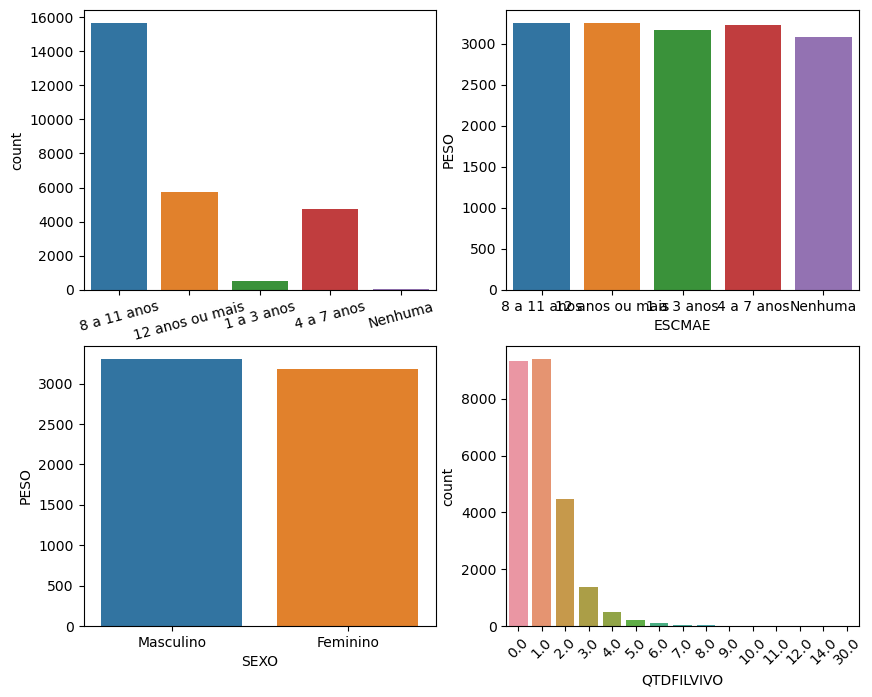

In [229]:
fig, axes = plt.subplots(2, 2)
plt.rc('figure', figsize=(10, 8))

ax1 = sns.countplot(ax = axes[0, 0], x='ESCMAE', data=sinasc_raw)
sns.barplot(ax = axes[0, 1], x='ESCMAE', y='PESO', errorbar = None, data=sinasc_raw)
sns.barplot(ax = axes[1, 0], x='SEXO', y='PESO', errorbar = None, data=sinasc_raw)
ax2 = sns.countplot(ax = axes[1, 1], x='QTDFILVIVO', data=sinasc_raw)

ax1.tick_params(axis="x", rotation = 15)
ax2.tick_params(axis="x", rotation = 45)

1 - Bebês do sexo masculino têm peso maior se compardo a bebês do sexo feminino, exceto em uma única ocasião, quando a escolaridade da mãe é de 4 a 7 anos.

2 - A maioria das mães tem entre 8 e 11 anos de estudo.

3 - A maior parte das mães tem pelos menos 1 filho vivo.

4 - A média da idade dos pais é maior do que a média da idade das mães na maioria dos municípios.